In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [162]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        
        #self.weights=np.zeros((X.shape[1]+1,1))
        self.weights=np.random.randn(X.shape[1]+1,1)
        for epoch in range(epochs):
            
            for batch in range(len(X)//batch_size):
               
               X_batch= X[batch*batch_size : (batch+1)*batch_size]
               y_batch = y[batch*batch_size : (batch+1)*batch_size]
               y_batch = y_batch.reshape(( y_batch.shape[0] ,1))
               X_batch= np.concatenate((X_batch, np.ones((X_batch.shape[0], 1))), axis=1)

               # Compute predictions and errors
               y_pred = self.predict(X_batch)
               errors = y_batch-y_pred
               
               
                
               # Update weights using gradient descent
               gradient = -np.dot(X_batch.T, errors) / len(X_batch)
               self.weights -= lr * gradient
               
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X_batch, y_batch))

    def get_loss(self, X, y):
        y=y.reshape(( y.shape[0] ,1))
        y_pred=self.predict(X)
        mse = np.mean(np.square(np.subtract(y,y_pred))) #MSE
        return mse
        

    def predict(self, X):
        y_pred = np.matmul(X,self.weights)
        return y_pred
                
    def evaluate(self, X, y):
        X_with_bias = np.concatenate((X,np.ones((X.shape[0],1))), axis=1)
        y_pred=self.predict(X_with_bias)
        y=y.reshape((len(y),1))
        y_pred=y_pred.reshape((len(y_pred),1))
        loss=np.mean(np.square(y-y_pred))
        return loss
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss)
        plt.xlabel("Epoch")
        plt.ylabel("Training Loss")
        plt.show() 
       

# Load data & data pre-processing

In [163]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))



In [164]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [167]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################
df_train["sex"].replace({"female": 0,"male": 1} ,inplace = True) 
df_train["smoker"].replace({'no':0,'yes':1},inplace=True)
df_train["region"].replace({"northeast":0,"northwest": 1,"southeast" :2,"southwest" :3 },inplace=True)


df_val["sex"].replace({"female": 0,"male": 1} ,inplace = True) 
df_val["smoker"].replace({'no':0,'yes':1},inplace=True)
df_val["region"].replace({"northeast":0,"northwest": 1,"southeast" :2,"southwest" :3 },inplace=True)


df_test["sex"].replace({"female": 0,"male": 1} ,inplace = True) 
df_test["smoker"].replace({'no':0,'yes':1},inplace=True)
df_test["region"].replace({"northeast":0,"northwest": 1,"southeast" :2,"southwest" :3 },inplace=True)

print(df_train.corr())

df_train.head()

# You may try different label encoding for training your own model


               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.053253  0.105642  0.033802 -0.004509 -0.006884  0.324213
sex      -0.053253  1.000000  0.015213  0.023992  0.068751 -0.002937  0.025908
bmi       0.105642  0.015213  1.000000  0.025009 -0.005701  0.141745  0.189973
children  0.033802  0.023992  0.025009  1.000000 -0.012050  0.000552  0.048509
smoker   -0.004509  0.068751 -0.005701 -0.012050  1.000000 -0.012810  0.789616
region   -0.006884 -0.002937  0.141745  0.000552 -0.012810  1.000000 -0.026971
charges   0.324213  0.025908  0.189973  0.048509  0.789616 -0.026971  1.000000


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Single feature (using bmi)

In [168]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]



In [169]:
# TODO

x_train=x_train.to_numpy()
y_train=y_train.to_numpy()

x_val=x_val.to_numpy()
y_val=y_val.to_numpy()

x_test=x_test.to_numpy()




# You may convert data to NumPy here 

In [170]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.0019
epochs = 120000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [171]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [1382.20058963]
Weights:  [[380.14514015]]


In [172]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48756102


In [173]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920237.86161086


In [174]:
x_test= np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1)
test_pred = linear_reg.predict(x_test)


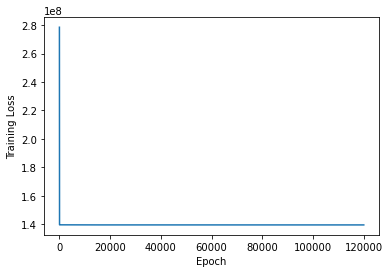

In [175]:
linear_reg.plot_curve()

/Users/bohanlin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


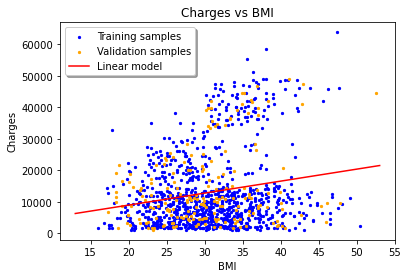

In [176]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO
plt.scatter(x_train,y_train,s=5,c = "blue",label="Training samples")
plt.scatter(x_val,y_val,s=5,c="orange",label="Validation samples")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Charges vs BMI")
function=np.poly1d([0,linear_reg.weights[0],linear_reg.weights[1]])
x=[13,53]
y=[function(x[0]),function(x[1])]
plt.plot(x,y,color="red",label="Linear model")
plt.legend(loc="upper left",shadow=True)
plt.show()

# Multiple features

In [177]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)
x_test.head()

,age,sex,bmi,children,smoker,region
0,33,1,30.25,0,0,2
1,19,0,32.49,0,1,1
2,50,1,37.07,1,0,2
3,41,0,32.60,3,0,3
4,52,0,24.86,0,0,2


In [178]:
# TODO
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()

x_val=x_val.to_numpy()
y_val=y_val.to_numpy()

x_test=x_test.to_numpy()

# You may convert data to NumPy here 

In [179]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0006
epochs = 1000000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [180]:
regression_test=LinearRegression()
regression_test.weights=[[259],[-383],[333],[442],[24032],[-416],[-11837]]
print('standard training loss: ', regression_test.evaluate(x_train, y_train))
print('standard validation loss: ', regression_test.evaluate(x_val, y_val))

Don't cheat.
standard training loss:  34697921.97166739
standard validation loss:  41986489.05352527


In [181]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  [-11857.05691459]
Weights:  [[  259.85086214]
 [ -383.54527256]
 [  333.33250502]
 [  442.55747113]
 [24032.220977  ]
 [ -416.01439469]]


In [182]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25351919


In [183]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958565.724924676


In [184]:
x_test= np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1)
test_pred = linear_reg.predict(x_test)

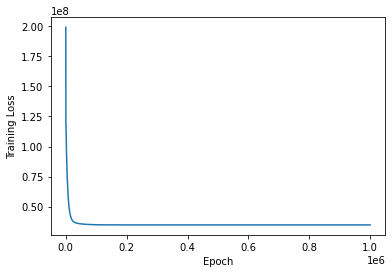

In [185]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [186]:
# Do not modify here

x_train = df_train.drop(['sex','children','region','charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['sex','children','region','charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['sex','children','region','charges'], axis=1)
x_train.head()

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [187]:
corr_table=df_train.corr()
print(corr_table)


               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.053253  0.105642  0.033802 -0.004509 -0.006884  0.324213
sex      -0.053253  1.000000  0.015213  0.023992  0.068751 -0.002937  0.025908
bmi       0.105642  0.015213  1.000000  0.025009 -0.005701  0.141745  0.189973
children  0.033802  0.023992  0.025009  1.000000 -0.012050  0.000552  0.048509
smoker   -0.004509  0.068751 -0.005701 -0.012050  1.000000 -0.012810  0.789616
region   -0.006884 -0.002937  0.141745  0.000552 -0.012810  1.000000 -0.026971
charges   0.324213  0.025908  0.189973  0.048509  0.789616 -0.026971  1.000000


In [188]:
def poly_expand(dataframe):
    dataframe['age^2']=dataframe['age']**2
    dataframe['age bmi']=dataframe['age']*dataframe['bmi']
    dataframe['age smoker']=dataframe['age']*dataframe['smoker']
    dataframe['bmi^2']=dataframe['bmi']**2
    dataframe['bmi smoker']=dataframe['bmi']*dataframe['smoker']
    dataframe['smoker^2']=dataframe['smoker']**2
    dataframe['age^2 smoker']=dataframe['age']**2*(dataframe['smoker']) 
    dataframe['bmi^2 smoker']=dataframe['bmi']**2*(dataframe['smoker']) 
    dataframe['age*bmi*smoker']=dataframe['bmi']*dataframe['age']*dataframe['smoker']
    return dataframe

def normalization(data):
    pass

new_x_train=poly_expand(x_train)
new_x_val=poly_expand(x_val)
new_x_test=poly_expand(x_test)
new_x_val.head()


,age,bmi,smoker,age^2,age bmi,age smoker,bmi^2,bmi smoker,smoker^2,age^2 smoker,bmi^2 smoker,age*bmi*smoker
0,18,26.180,0,324,471.24,0,685.392400,0.0,0,0,0.0,0.0
1,53,29.480,0,2809,1562.44,0,869.070400,0.0,0,0,0.0,0.0
2,18,23.210,0,324,417.78,0,538.704100,0.0,0,0,0.0,0.0
3,50,46.090,0,2500,2304.50,0,2124.288100,0.0,0,0,0.0,0.0
4,18,40.185,0,324,723.33,0,1614.834225,0.0,0,0,0.0,0.0


In [189]:
new_x_train=x_train.to_numpy()
y_train=y_train.to_numpy()

new_x_val=x_val.to_numpy()
y_val=y_val.to_numpy()

new_x_test=x_test.to_numpy()




In [190]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
#6個零
lr = 0.00000027
epochs = 10000000

linear_reg = LinearRegression()
linear_reg.fit(new_x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


training loss:  22147305.91689645
validation loss:  28564354.759521224


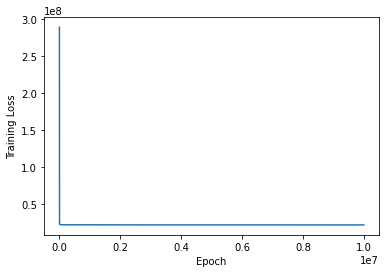

In [191]:
print('training loss: ', linear_reg.evaluate(new_x_train, y_train))
print('validation loss: ', linear_reg.evaluate(new_x_val, y_val))
linear_reg.plot_curve()

In [192]:
new_x_test= np.concatenate((new_x_test, np.ones((new_x_test.shape[0], 1))), axis=1)
test_pred = linear_reg.predict(new_x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [193]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("311552034_prediction.csv")